In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:\\Users\\ACER\\OneDrive\\Desktop\\PythonDesk\\CaseStudy\\4. Basic Statistics - Hypothesis Testing')
##pd.options.display.float_format = '{:.0f}'.format

import scipy.stats as stats
import time

# Business Problem 1 - LOANS DATA

In [2]:
loans_df = pd.read_csv('LoansData.csv')

In [3]:
loans_df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
loans_df.shape

(2500, 14)

In [5]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

## Removing dots in column Names

In [6]:
for i in loans_df.columns:
    loans_df.rename(columns = {i:i.replace('.','_')}, inplace=True)

In [7]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

## Correcting Datatypes - Interest_Rate, Debt_To_Income_Ratio ==> float

In [8]:
loans_df.Interest_Rate = loans_df.Interest_Rate.str.replace('%','').astype(float)

In [9]:
loans_df.Debt_To_Income_Ratio = loans_df.Debt_To_Income_Ratio.str.replace('%','').astype(float)

In [10]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   float64
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [11]:
loans_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount_Requested,2499.0,12405.462185,7802.933666,1000.00,6000.00,10000.00,17000.000,35000.00
Amount_Funded_By_Investors,2499.0,12002.374186,7746.767348,-0.01,6000.00,10000.00,16000.000,35000.00
Interest_Rate,2498.0,13.065388,4.177201,5.42,10.16,13.11,15.800,24.89
Debt_To_Income_Ratio,2499.0,15.380420,7.505052,0.00,9.75,15.32,20.675,34.91
Monthly_Income,2499.0,5688.931321,3963.118185,588.50,3500.00,5000.00,6800.000,102750.00
Open_CREDIT_Lines,2497.0,10.072887,4.507416,2.00,7.00,9.00,13.000,38.00
Revolving_CREDIT_Balance,2497.0,15223.184622,18281.015258,0.00,5584.00,10948.00,18861.000,270800.00
Inquiries_in_the_Last_6_Months,2497.0,0.906688,1.231149,0.00,0.00,0.00,1.000,9.00


In [12]:
loans_df.describe(include= 'object').T

,count,unique,top,freq
Loan_Length,2500,2,36 months,1952
Loan_Purpose,2500,14,debt_consolidation,1307
State,2500,46,CA,433
Home_Ownership,2499,5,MORTGAGE,1147
FICO_Range,2498,38,670-674,171
Employment_Length,2423,11,10+ years,653


## Checking inconsistency in data

In [13]:
for i in loans_df.select_dtypes('object').columns:
    print('\n')
    print(loans_df[i].value_counts().nlargest(5))



Loan_Length
36 months    1952
60 months     548
Name: count, dtype: int64


Loan_Purpose
debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
Name: count, dtype: int64


State
CA    433
NY    255
TX    174
FL    169
IL    101
Name: count, dtype: int64


Home_Ownership
MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: count, dtype: int64


FICO_Range
670-674    171
675-679    166
680-684    157
695-699    153
665-669    145
Name: count, dtype: int64


Employment_Length
10+ years    653
< 1 year     250
2 years      244
3 years      235
5 years      202
Name: count, dtype: int64


In [14]:
loans_df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


## Check missing values

In [15]:
loans_df.isnull().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

## Deciding whether to impute or drop missing values

In [16]:
loans_df.isnull().sum()/len(loans_df)*100

Amount_Requested                  0.04
Amount_Funded_By_Investors        0.04
Interest_Rate                     0.08
Loan_Length                       0.00
Loan_Purpose                      0.00
Debt_To_Income_Ratio              0.04
State                             0.00
Home_Ownership                    0.04
Monthly_Income                    0.04
FICO_Range                        0.08
Open_CREDIT_Lines                 0.12
Revolving_CREDIT_Balance          0.12
Inquiries_in_the_Last_6_Months    0.12
Employment_Length                 3.08
dtype: float64

In [17]:
loans_df.dropna(subset=['Amount_Requested','Amount_Funded_By_Investors','Interest_Rate','Debt_To_Income_Ratio','Home_Ownership','Monthly_Income'\
                        ,'FICO_Range','Open_CREDIT_Lines','Revolving_CREDIT_Balance','Inquiries_in_the_Last_6_Months','Employment_Length'], inplace=True)

In [18]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2413 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2413 non-null   float64
 1   Amount_Funded_By_Investors      2413 non-null   float64
 2   Interest_Rate                   2413 non-null   float64
 3   Loan_Length                     2413 non-null   object 
 4   Loan_Purpose                    2413 non-null   object 
 5   Debt_To_Income_Ratio            2413 non-null   float64
 6   State                           2413 non-null   object 
 7   Home_Ownership                  2413 non-null   object 
 8   Monthly_Income                  2413 non-null   float64
 9   FICO_Range                      2413 non-null   object 
 10  Open_CREDIT_Lines               2413 non-null   float64
 11  Revolving_CREDIT_Balance        2413 non-null   float64
 12  Inquiries_in_the_Last_6_Months  2413 no

## Check duplicates

In [19]:
print(loans_df.duplicated().sum(), 'duplicates found')

0 duplicates found


## Univariate Analysis

In [20]:
num_df = loans_df.select_dtypes('number').drop(columns = ['Interest_Rate'])
cat_df = loans_df.select_dtypes('object')

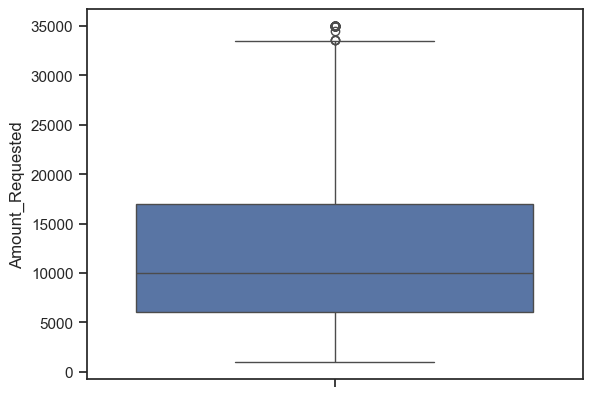

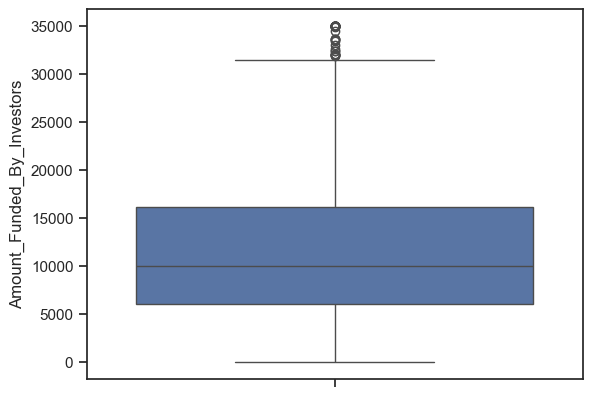

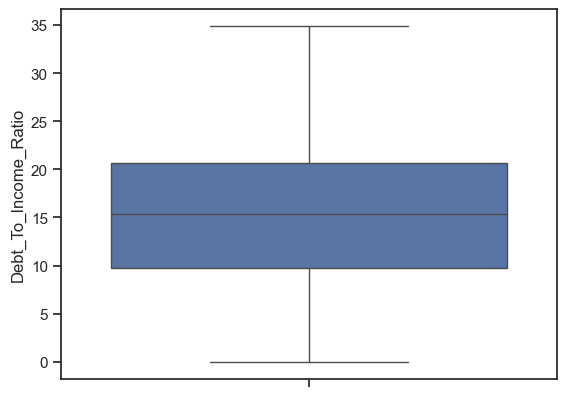

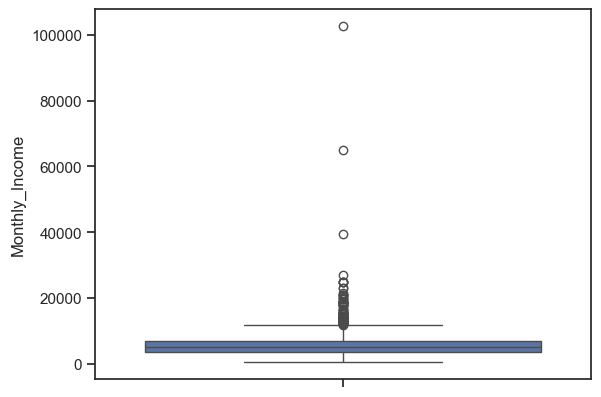

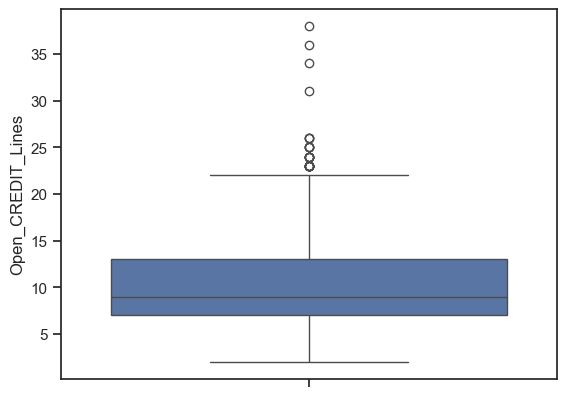

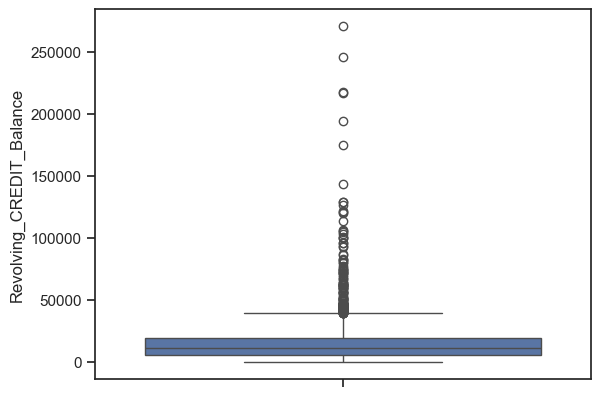

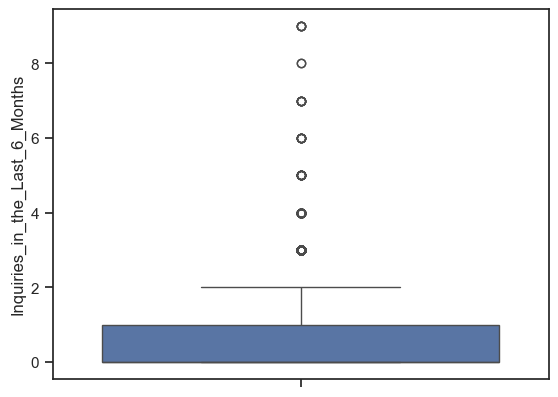

In [21]:
for i in num_df.columns:
    sns.boxplot(data = num_df[i])
    plt.show()

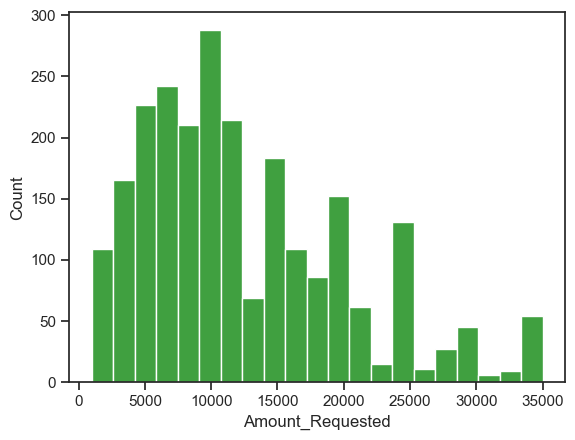

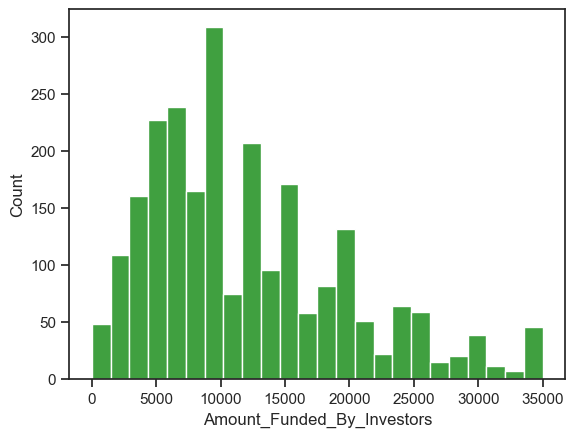

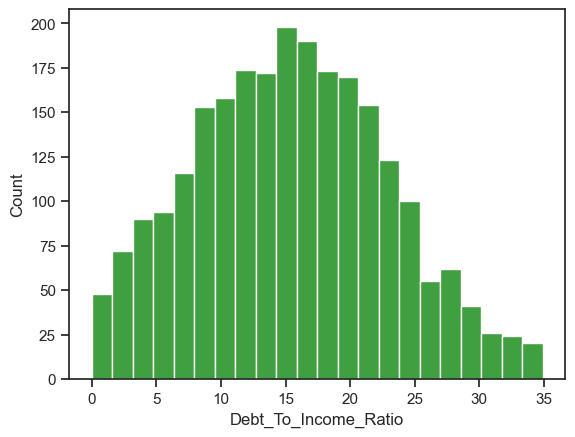

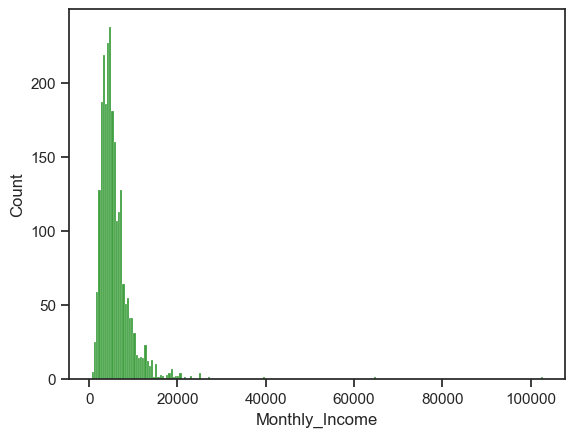

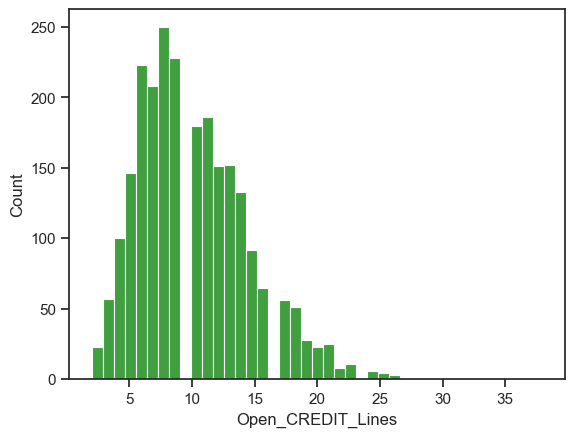

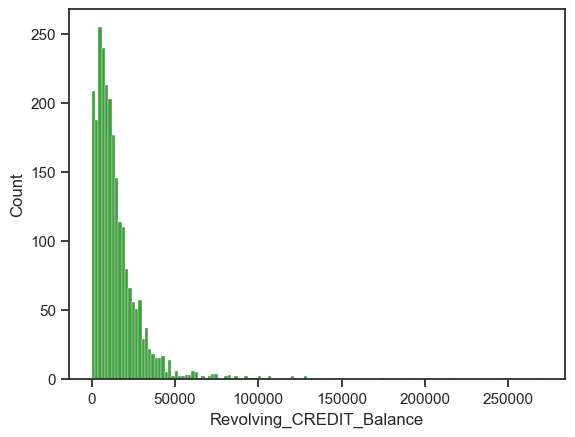

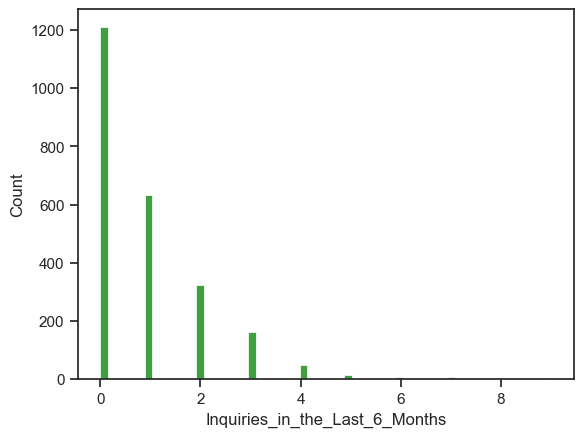

In [22]:
for i in num_df.columns:
    sns.histplot(data = num_df, x = num_df[i], color = 'green')
    plt.show()

In [23]:
cat_df.Loan_Purpose.unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

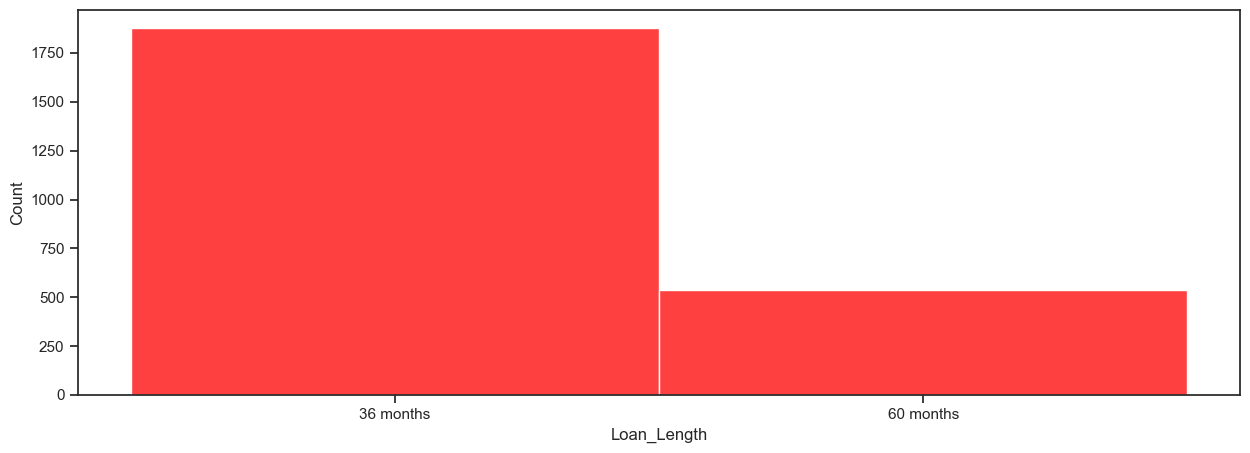

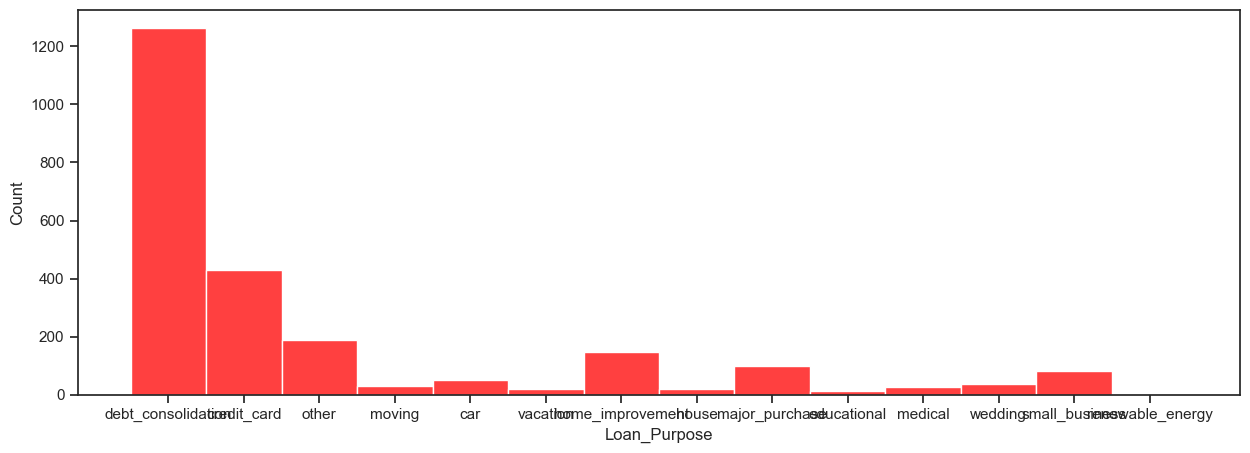

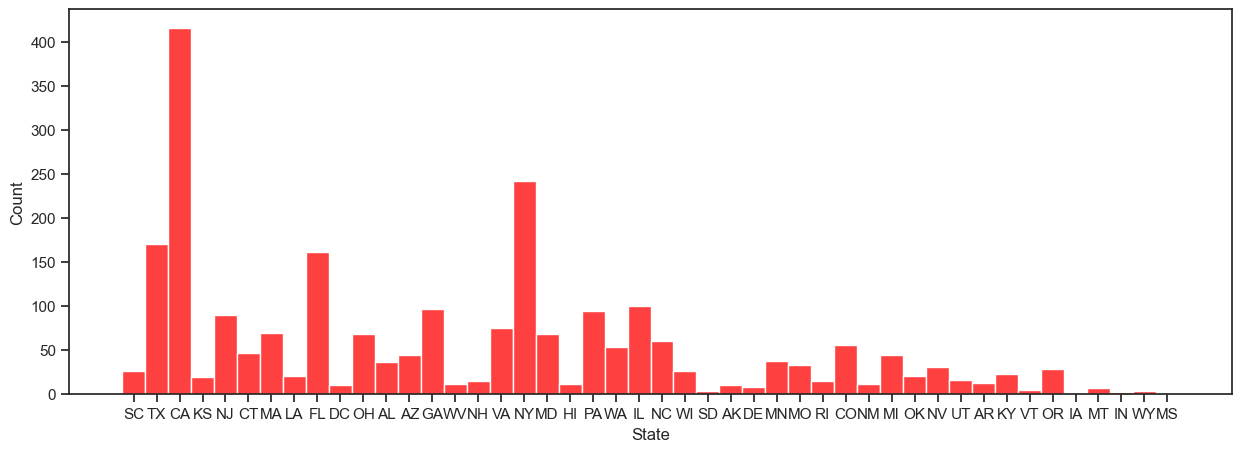

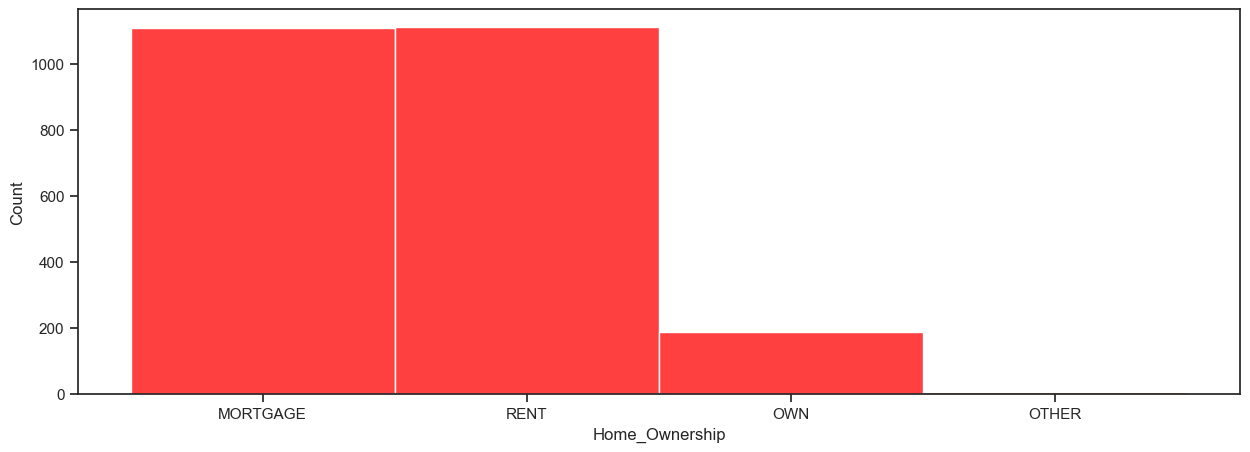

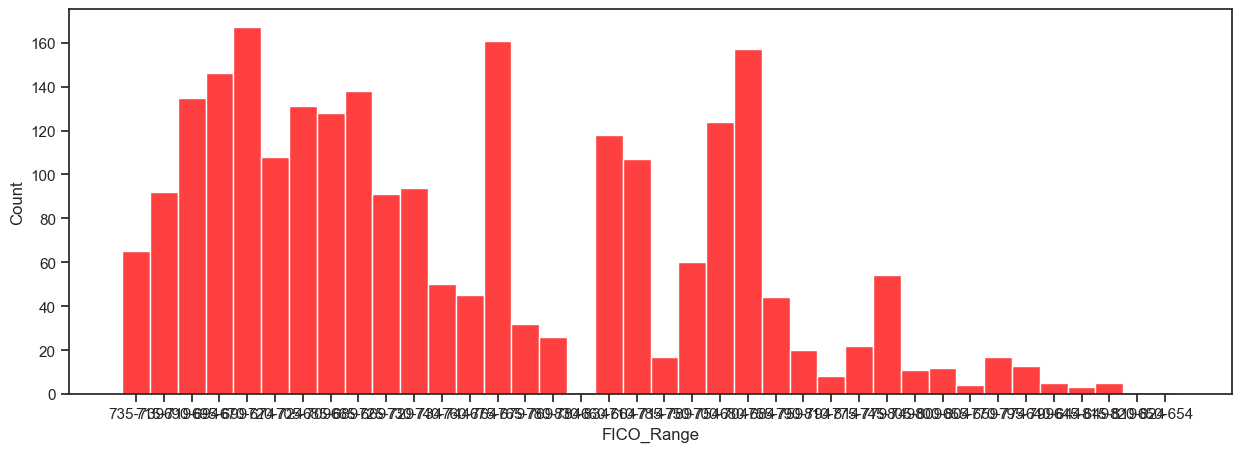

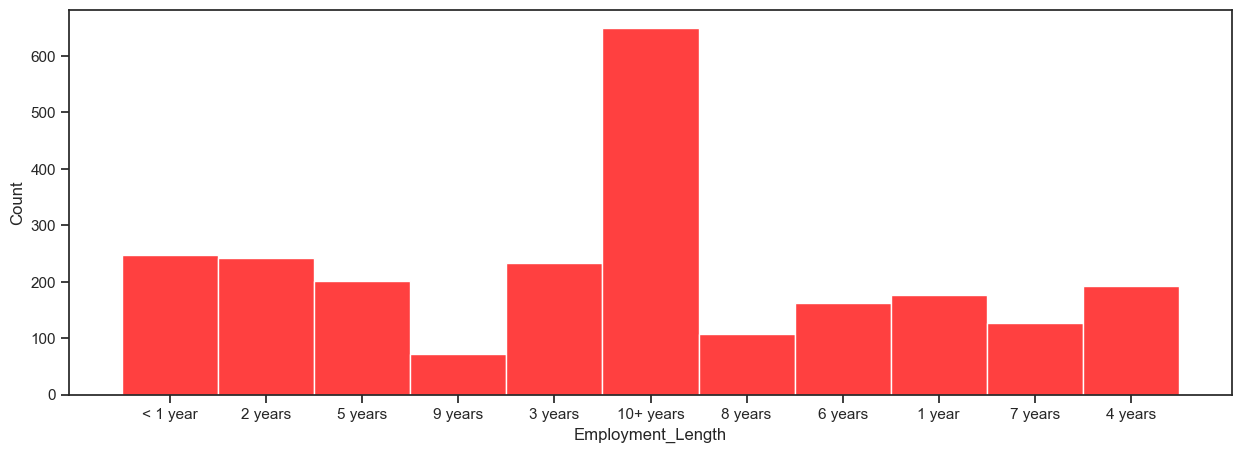

In [81]:
for i in cat_df.columns:
    plt.figure(figsize = (15,5))
    sns.histplot(data= cat_df, x = i, color='red')
    plt.show()

## Bivariate Analysis

In [24]:
num_df.corr()

,Amount_Requested,Amount_Funded_By_Investors,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
Amount_Requested,1.000000,0.968689,0.084530,0.385311,0.189265,0.300470,-0.034894
Amount_Funded_By_Investors,0.968689,1.000000,0.097413,0.368502,0.179008,0.267960,-0.074422
Debt_To_Income_Ratio,0.084530,0.097413,1.000000,-0.164908,0.375827,0.187332,0.017145
Monthly_Income,0.385311,0.368502,-0.164908,1.000000,0.164233,0.362667,0.030261
Open_CREDIT_Lines,0.189265,0.179008,0.375827,0.164233,1.000000,0.286646,0.114457
Revolving_CREDIT_Balance,0.300470,0.267960,0.187332,0.362667,0.286646,1.000000,0.013789
Inquiries_in_the_Last_6_Months,-0.034894,-0.074422,0.017145,0.030261,0.114457,0.013789,1.000000


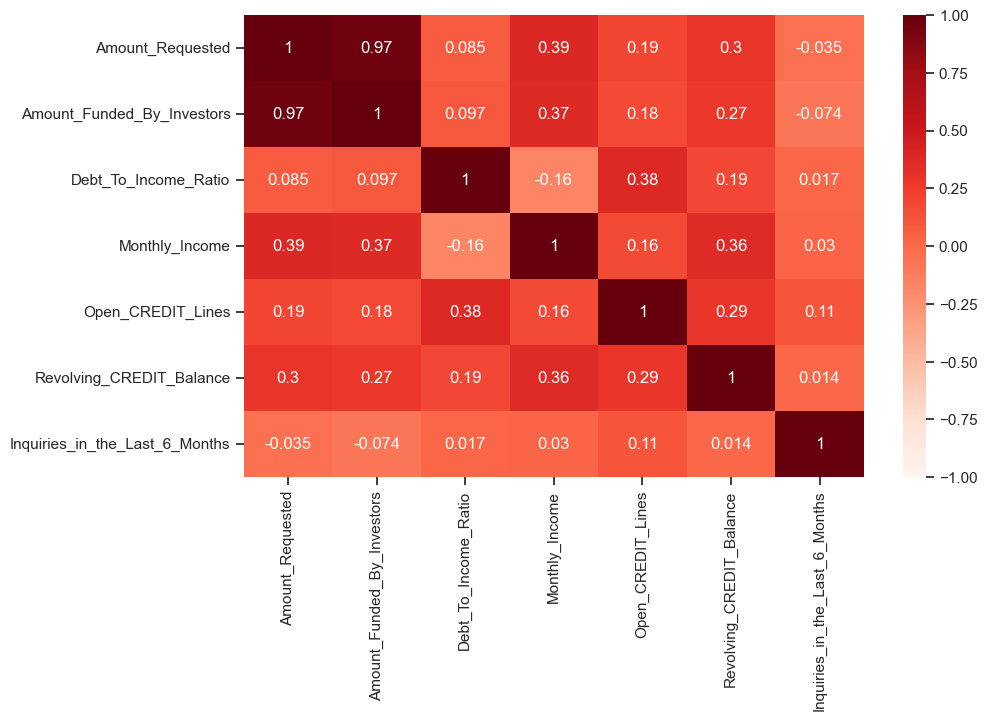

In [25]:
plt.figure(figsize= (10,6))
sns.heatmap(data = num_df.corr(), annot=True, vmin=-1, vmax = 1, cmap = 'Reds')
plt.show()

In [26]:
for i in cat_df:
    print('\n')
    print('feature:',i)
    print(pd.Categorical(cat_df[i].unique()))
    print(pd.Categorical(cat_df[i].unique()).codes)
    #pd.Categorical(values= cat_df[i]).codes



feature: Loan_Length
['36 months', '60 months']
Categories (2, object): ['36 months', '60 months']
[0 1]


feature: Loan_Purpose
['debt_consolidation', 'credit_card', 'other', 'moving', 'car', ..., 'educational', 'medical', 'wedding', 'small_business', 'renewable_energy']
Length: 14
Categories (14, object): ['car', 'credit_card', 'debt_consolidation', 'educational', ..., 'renewable_energy', 'small_business', 'vacation', 'wedding']
[ 2  1  9  8  0 12  4  5  6  3  7 13 11 10]


feature: State
['SC', 'TX', 'CA', 'KS', 'NJ', ..., 'IA', 'MT', 'IN', 'WY', 'MS']
Length: 46
Categories (46, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']
[36 38  4 15 27  6 18 17  9  7 31  1  3 10 44 26 40 30 19 11 34 42 13 25
 43 37  0  8 21 22 35  5 28 20 32 29 39  2 16 41 33 12 24 14 45 23]


feature: Home_Ownership
['MORTGAGE', 'RENT', 'OWN', 'OTHER']
Categories (4, object): ['MORTGAGE', 'OTHER', 'OWN', 'RENT']
[0 3 2 1]


feature: FICO_Range
['735-739', '715-719', '690-694', '695-699', '670

In [27]:
cat_df

,Loan_Length,Loan_Purpose,State,Home_Ownership,FICO_Range,Employment_Length
0,36 months,debt_consolidation,SC,MORTGAGE,735-739,< 1 year
1,36 months,debt_consolidation,TX,MORTGAGE,715-719,2 years
2,60 months,debt_consolidation,CA,MORTGAGE,690-694,2 years
3,36 months,debt_consolidation,KS,MORTGAGE,695-699,5 years
4,36 months,credit_card,NJ,RENT,695-699,9 years
...,...,...,...,...,...,...
2495,60 months,debt_consolidation,NY,MORTGAGE,705-709,8 years
2496,60 months,home_improvement,MD,OWN,740-744,10+ years
2497,36 months,debt_consolidation,PA,MORTGAGE,680-684,10+ years
2498,36 months,major_purchase,NJ,RENT,675-679,5 years


## Outlier Treatment

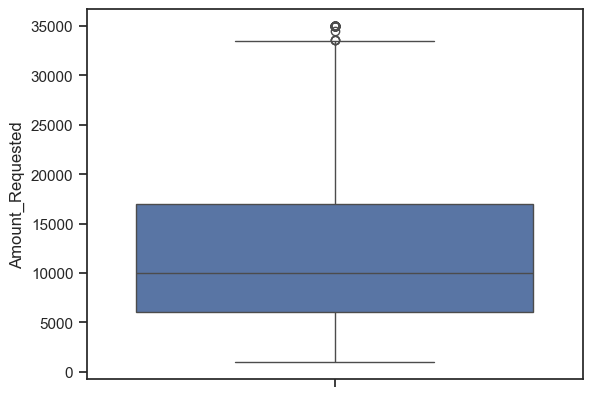

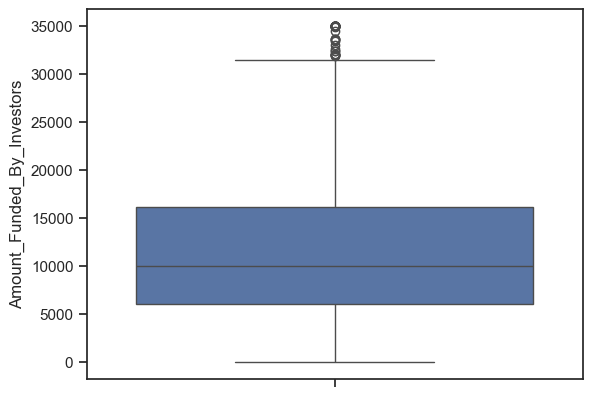

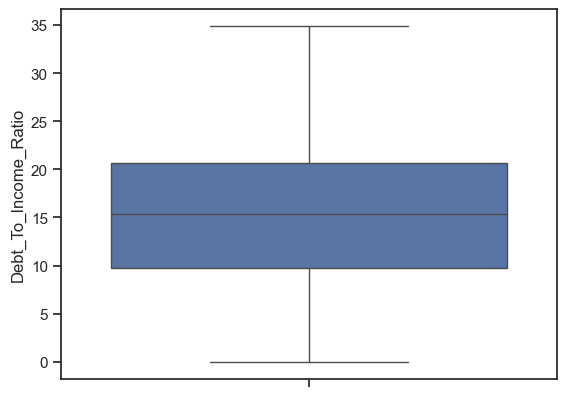

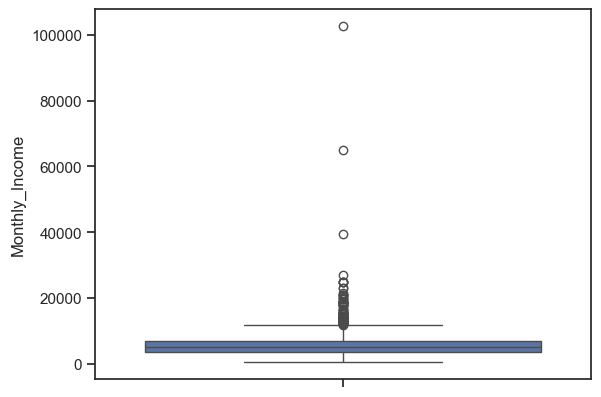

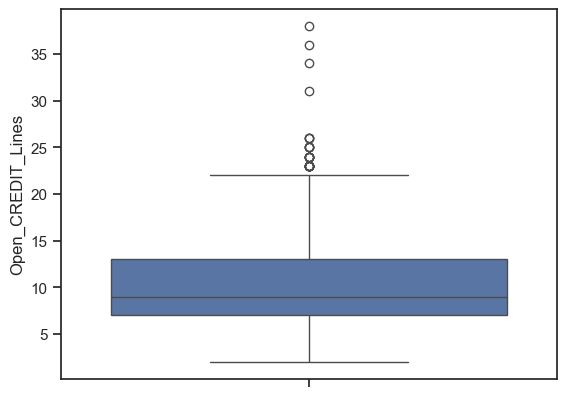

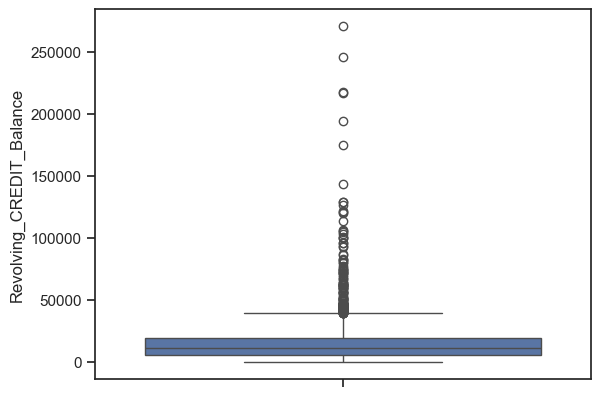

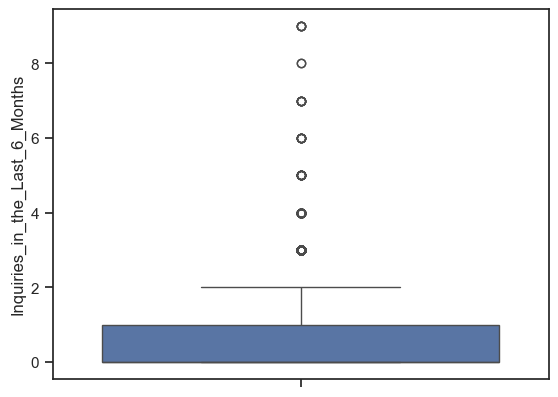

In [28]:
for i in num_df.columns:
    sns.boxplot(data=num_df[i])
    plt.show()

In [29]:
for i in num_df.columns:
    q1 = num_df[i].quantile(0.25)
    q3 = num_df[i].quantile(0.75)
    IQR = q3 - q1
    lower_ = q1 - (1.5*IQR)
    upper_ = q3 + (1.5*IQR)
    num_df[i] = num_df[i].clip(lower = lower_, upper = upper_)

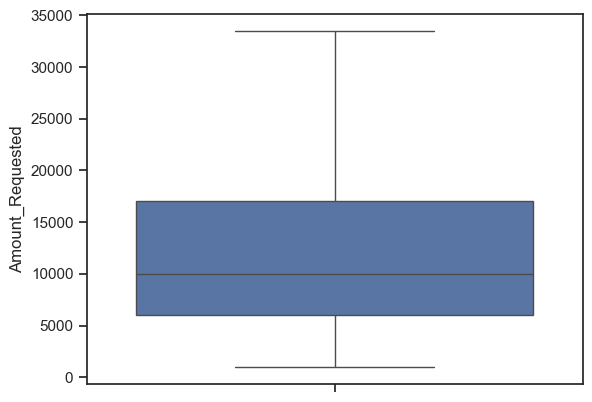

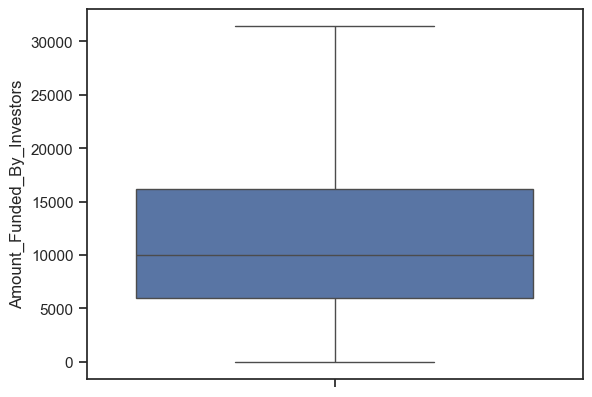

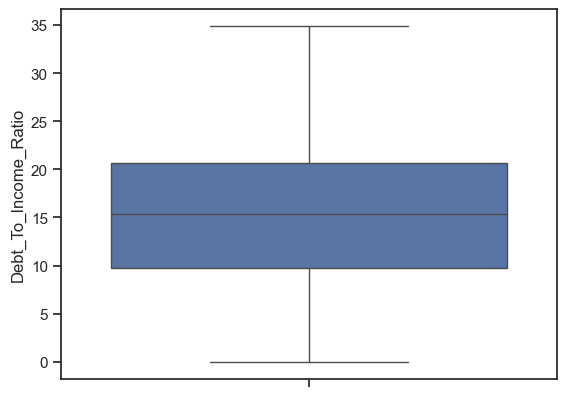

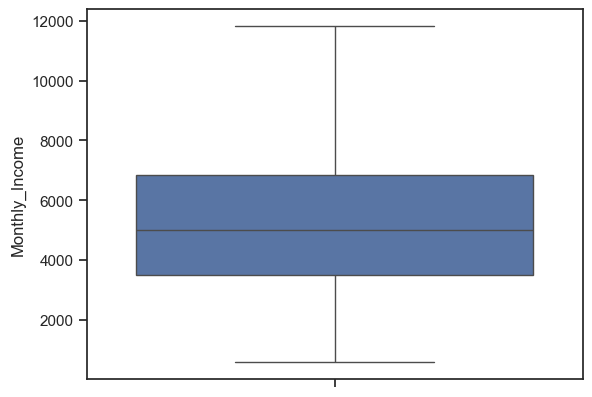

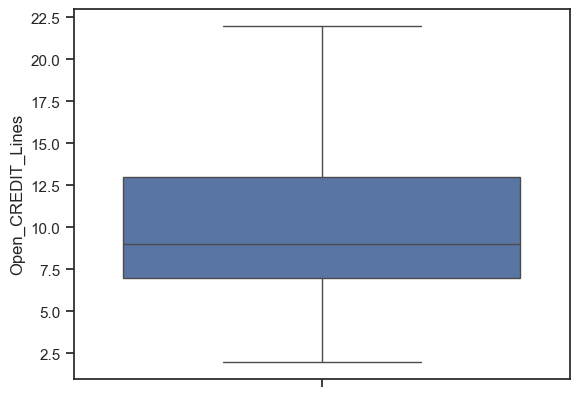

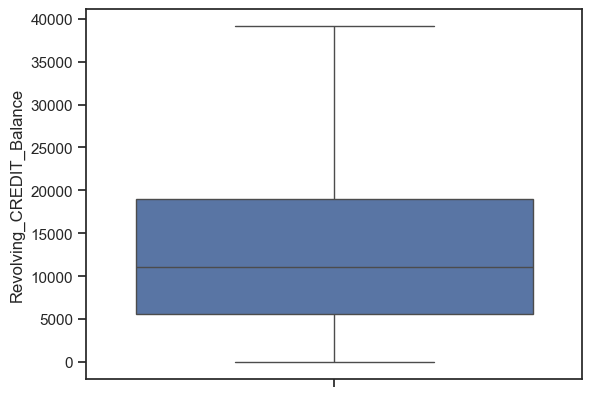

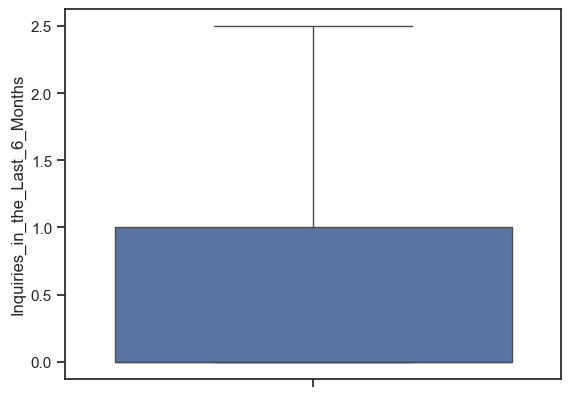

In [30]:
for i in num_df.columns:
    sns.boxplot(data = num_df[i])
    plt.show()

In [123]:
## a. Interest rate is varied for different loan amounts (Less intrest charged for high loan amounts) 

In [ ]:
## Data values are numerical in nature - Amount_Requested, Interest_Rate
## Parameters - Amount_Requested, Interest_Rate
## Hypothesis testing - Pearson Correlation test; two quantitative data samples involved

In [34]:
##Relationship between two numerical variables
loans_df.Amount_Requested.corr(loans_df.Interest_Rate, method='pearson')

0.3265583478468461

In [35]:
##using stats pearsonr method
stats.pearsonr(loans_df.Amount_Requested, loans_df.Interest_Rate)

PearsonRResult(statistic=0.3265583478468487, pvalue=4.54550850928314e-61)

#### Pearson Correlation test - relationship between two quantitative data
#### BUSINESS CONCLUSION: # As the value of Pearson Correlation test is POSITIVE 
#### We can conclude that total Interest Rate is positively correlated to the Loan Amount(Amount_Requested)

In [45]:
## b. Loan length is directly effecting intrest rate.

In [37]:
loans_df.Loan_Length.unique()

array(['36 months', '60 months'], dtype=object)

In [ ]:
## Data values are continuous - Interest rate by Loan Length
## Parameters - Loan Length, Interest Rate
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - As there are two numerical columns involved, we will go for t-test, independent sample
## We will test our hypothesis at 5% significance level 

In [47]:
##Data Collection
len_36 = loans_df[loans_df.Loan_Length == '36 months'].Interest_Rate
len_60 = loans_df[loans_df.Loan_Length == '60 months'].Interest_Rate

In [51]:
res = stats.ttest_ind(len_36, len_60)
res.pvalue

1.79380106734165e-106

#### t-test pvalue is greater than p critical(0.05)
#### pvalue > pcritical
#### We accept NULL Hypothesis (H0)  - p is high NULL will fly
#### BUSINESS CONCLUSION: # As the significance value of t test is greater than 0.05 we can safely conclude with 95% confidence that Loan length is directly affecting interest rate.

In [ ]:
## c. Interest rate varies for different purpose of loans

In [ ]:
H0 => Interest rate varies for diff loan purpose
Ha => Interest rate DOES NOT varies for diff loan purpose

In [ ]:
## Data values are  - Interest rate by Loan Purpose
## Parameters - Loan Purpose, Interest Rate
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - we will go for Chi square test
## We will test our hypothesis at 5% significance level 

In [52]:
loans_df.Loan_Purpose.unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [55]:
tab = pd.crosstab(loans_df.Interest_Rate, loans_df.Loan_Purpose).T

In [57]:
tab_pv = stats.chi2_contingency(tab)

In [58]:
tab_pv.pvalue

1.7155181689604634e-18

#### Chi square test pvalue is greater than p critical(0.05)
#### pvalue > pcritical
#### We accept NULL Hypothesis (H0)  - p is high NULL will fly
#### BUSINESS CONCLUSION: # As the significance value of t test is greater than 0.05 we can safely conclude with 95% confidence that Interest rate varies for diff loan purposes.

In [59]:
## d. There is relationship between FICO scores and Home Ownership. It means that, People with own home will have high FICO scores

In [ ]:
H0 => There is relationship between FICO scores and Home Ownership
Ha => There is NO relationship between FICO scores and Home Ownership

In [ ]:
## Data values are categorical - FICO score and Home_Ownership
## Parameters - Home_Ownership, FICO_Range
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - As we are comparing two categorical columns, we will go for chi square test
## We will test our hypothesis at 5% significance level 

In [63]:
home_ct = pd.crosstab(loans_df.Home_Ownership, loans_df.FICO_Range)

In [64]:
home_ct

FICO_Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home_Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,40,52,66,78,55,58,...,19,12,15,7,7,6,5,5,0,1
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,14,17,13,10,9,10,...,3,1,1,1,3,2,1,0,1,0
RENT,4,2,0,3,64,69,87,72,91,60,...,4,4,4,5,2,3,2,0,0,0


In [66]:
pv1 = stats.chi2_contingency(home_ct)

In [67]:
pv1.pvalue

3.0875472813837764e-15

#### Chi square test pvalue is greater than p critical(0.05)
#### pvalue > pcritical
#### We accept NULL Hypothesis (H0)  - p is high NULL will fly
#### BUSINESS CONCLUSION: # As the significance value of t test is greater than 0.05 we can safely conclude with 95% confidence that there is relationship between FICO scores and Home Ownership

# Business Problem 2 - Price Quotes

In [68]:
price_quote = pd.read_csv('Price_Quotes.csv')

In [69]:
price_quote

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [71]:
price_quote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [72]:
## We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [73]:
price_quote.Barry_Price.mean()

124.33333333333333

In [74]:
price_quote.Mary_Price.mean()

114.75

In [ ]:
H0 => Average price quotes provided by Mary and Barry are similar or equal.
Ha => Average price quotes provided by Mary and Barry are different or unequal

In [76]:
## Data values are numerical in nature - Mary_Price and Barry_Price
## Parameters - Mary_Price, Barry_Price
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - As we are comparing two categorical columns, we will go for chi square test
## We will test our hypothesis at 5% significance level 

In [79]:
#Data Collection
mp = price_quote.Mary_Price
bp = price_quote.Barry_Price

In [86]:
tt = stats.ttest_rel(mp,bp)

In [87]:
tt.pvalue

0.02840588045242053

#### t-test pvalue is less than p critical(0.05)
#### pvalue < pcritical
#### We accept Alternate Hypothesis (Ha)  - p is low, NULL will go
#### BUSINESS CONCLUSION: # As the significance value of t test is less than 0.05 we can safely conclude with 95% confidence that average price quote provided by BArry and Mary are different.

# BUSINESS PROBLEM 3 - Treatment Facility

In [90]:
tfac_df = pd.read_csv('Treatment_Facility.csv')

In [93]:
tfac_df.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [104]:
# Renaming VAR4 and VAR5 columns as TRFF and CI respectively
tfac_df.rename(columns = {'VAR4':'TRFF','VAR5':'CI'}, inplace=True)

In [105]:
tfac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   TRFF               20 non-null     float64
 4   CI                 20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes


In [94]:
# BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover.
# i.e To determine if the reengineering effort changed the critical incidence rate. 

In [95]:
tfac_df.Reengineer.value_counts()

Reengineer
Prior    13
Post      7
Name: count, dtype: int64

In [ ]:
H0 => Irrespective of Reengineering efforts, behavioral issues and staff turnover has NO change
Ha => Behavioral issues ans staff turnover improves post reengineering.

In [ ]:
## Data values are numerical in nature - Pre and post reengineering data
## Parameters - Prior_reeng, post_reeng
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - As we are comparing two numerical columns, we will go for ttest test
## We will test our hypothesis at 5% significance level 

In [100]:
# DATA COLLECTION
prior = tfac_df[tfac_df.Reengineer == 'Prior'].Employee_Turnover
post = tfac_df[tfac_df.Reengineer == 'Post'].Employee_Turnover

In [102]:
reen = stats.ttest_ind(prior, post)

In [103]:
reen.pvalue

0.09361109345535304

#### t-test pvalue is greater than p critical(0.05)
#### pvalue > pcritical
#### We accept NULL Hypothesis (H0)  - p is high, NULL will fly
#### BUSINESS CONCLUSION: # As the significance value of t test is less than 0.05 we can safely conclude with 95% confidence that behvioral issues and staff turnover has no change post reengineering.

In [106]:
#Is there evidence that the critical incidence rate improved?

In [ ]:
H0 => Critical incidence rate remained same post reengineering
Ha => Critical incidence rate had improved post reengineering.

In [ ]:
## Data values are numerical in nature - Pre and post reengineering data
## Parameters - Prior_reeng, post_reeng
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - As we are comparing two numerical columns, we will go for ttest test
## We will test our hypothesis at 5% significance level 

In [107]:
#Data Collection
prior_ci = tfac_df[tfac_df.Reengineer == 'Prior'].CI
post_ci = tfac_df[tfac_df.Reengineer == 'Post'].CI

In [109]:
pvl = stats.ttest_ind(prior_ci, post_ci)

In [110]:
pvl.pvalue

0.12091989189884148

#### t-test pvalue is greater than p critical(0.05)
#### pvalue > pcritical
#### We accept NULL Hypothesis (H0)  - p is high, NULL will fly
#### BUSINESS CONCLUSION: # As the significance value of t test is less than 0.05 we can safely conclude with 95% confidence that Critical incidence rate has not improved post reengineering.

# BUSINESS PROBLEM 4 - Priority Assessment

In [111]:
assess_df = pd.read_csv('Priority_Assessment.csv')

In [114]:
assess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [115]:
assess_df.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


In [116]:
assess_df.Priority.value_counts()

Priority
High      326
Medium    249
Low        67
Name: count, dtype: int64

In [ ]:
H0 ==> Prioritisation system, jobs are happening as ususal and remained same across.
Ha ==> Prioritisation system is working and high priorty jobs are happeing quickly then medeium priority, same applies to medium vs low.

In [ ]:
## Data values are numerical in nature - high, medium and low priority days
## Parameters - Priority and Days
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - As we are comparing more than two numerical columns, we will go for f test or annova test
## We will test our hypothesis at 5% significance level 

In [117]:
#Data Collection
highP_days = assess_df[assess_df.Priority == 'High'].Days
lowP_days = assess_df[assess_df.Priority == 'Low'].Days
medP_days = assess_df[assess_df.Priority == 'Medium'].Days

In [120]:
jobs = stats.f_oneway(highP_days,medP_days,lowP_days)

In [121]:
jobs.pvalue

0.16411459461716182

#### f-test pvalue is greater than p critical(0.05)
#### pvalue > pcritical
#### We accept NULL Hypothesis (H0)  - p is high, NULL will fly
#### BUSINESS CONCLUSION: # As the significance value of t test is less than 0.05 we can safely conclude with 95% confidence that Prioritisation system is not working as expected.

# BUSINESS PROBLEM 5 - Films -  Denver Film Society

In [189]:
survey_df = pd.read_csv('Films.csv')

In [190]:
survey_df

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [191]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [192]:
survey_df.nunique()

_rowstate_         1
Movie              3
Gender             4
Marital_Status     5
Sinage             5
Parking            5
Clean              5
Overall            5
Age                4
Income             3
Hear_About        11
dtype: int64

### DATA PREP

In [193]:
#drop _rowstate_ column
survey_df.drop(columns=['_rowstate_'], inplace=True)

In [194]:
survey_df.Marital_Status.unique()

array(['Married', 'Single', 'Slngle', '1', '2', nan], dtype=object)

In [195]:
#Correcting the Marital Status Column with correct values
#Replacing The patron’s marital status: 1 = married; 2 = single
survey_df.Marital_Status = survey_df.Marital_Status.str.replace('Slngle', 'Single').str.replace('1','Married').str.replace('2','Single')

In [196]:
survey_df.Marital_Status.unique()

array(['Married', 'Single', nan], dtype=object)

In [197]:
survey_df.Gender.unique()

array(['Female', 'Male', '2', '1'], dtype=object)

In [198]:
#Correcting the Gender Column with correct values
#Replacing The patron’s gender: 1 = male; 2 = female
survey_df.Gender = survey_df.Gender.str.replace('1','Male').str.replace('2','Female')

In [199]:
survey_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [200]:
survey_df.isnull().sum()

Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [202]:
survey_df.Overall.mode()

0    2.0
Name: Overall, dtype: float64

In [203]:
# Missing value treatment - Continuous columns
for i in survey_df.select_dtypes('number').columns:
    survey_df[i] = survey_df[i].fillna(survey_df[i].mode()[0])

In [204]:
# Missing value treatment - Categorical columns
for i in survey_df.select_dtypes('object').columns:
    survey_df[i] = survey_df[i].fillna(survey_df[i].mode()[0])

In [205]:
survey_df.isnull().sum()

Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

### BUSINESS PROBLEM

In [206]:
survey_df.Sinage.value_counts()

Sinage
2.0    158
1.0    113
3.0     48
4.0      6
5.0      5
Name: count, dtype: int64

In [207]:
pd.crosstab(survey_df.Gender, survey_df.Overall)

Overall,1.0,2.0,3.0,4.0,5.0
Gender,,,,,
Female,102,103,5,1,2
Male,49,59,7,0,2


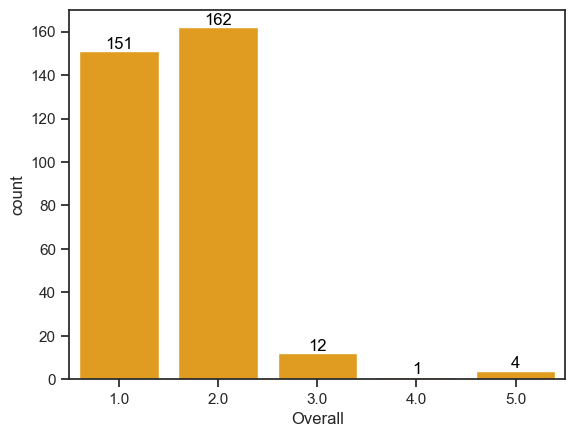

In [218]:
ovr = sns.countplot(data = survey_df, x=survey_df.Overall, color='orange')
ovr.bar_label(container = ovr.containers[0], label_type='edge', color='black')
plt.show()

In [217]:
## We can conclude that there is very high level of OVERALL satisfaction among patrons with most values being 1 or 2. 
## 12 people rated it average and ONLY 5 people given poor or very poor overall satisfation

In [ ]:
H0 => Sinage has No relationship or affect on OVERALL satisfaction
Ha => Sinage has strong affect on OVERALL satisfation

In [ ]:
## Data values are numerical in nature - Sinage, Overall
## Parameters - Sinage, Overall
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - As we are finding affect of Sinage on Overall satisfatcion or finding relationship, we will go for Pearson Correationship
## We will test our hypothesis at 5% significance level 

In [219]:
#Data Collection
stats.pearsonr(survey_df.Sinage, survey_df.Overall)

PearsonRResult(statistic=0.3821028042239568, pvalue=6.501065434766965e-13)

In [220]:
survey_df.Sinage.corr(survey_df.Overall)

0.3821028042239565

In [221]:
pd.crosstab(survey_df.Overall, survey_df.Sinage)

Sinage,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,90,44,13,2,2
2.0,22,109,25,4,2
3.0,0,4,8,0,0
4.0,0,0,1,0,0
5.0,1,1,1,0,1


In [223]:
## Sinage has very strong relationship with Overall Satisfaction
## Sinage has strong affect on Overall Satisfaction

In [ ]:
b. Factor - Parking

In [ ]:
H0 => Parking has No relationship or affect on OVERALL satisfaction
Ha => Parking has strong affect on OVERALL satisfation

In [ ]:
## Data values are numerical in nature - Parking, Overall
## Parameters - Parking, Overall
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - As we are finding affect of Parking on Overall satisfatcion or finding relationship, we will go for Pearson Correationship
## We will test our hypothesis at 5% significance level 

In [225]:
#Data Collection
stats.pearsonr(survey_df.Parking, survey_df.Overall)

PearsonRResult(statistic=0.5144289487855276, pvalue=1.0840276087789518e-23)

In [227]:
survey_df.Parking.corr(survey_df.Overall)

0.5144289487855271

In [228]:
pd.crosstab(survey_df.Overall, survey_df.Parking)

Parking,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,105,40,4,2,0
2.0,27,111,20,3,1
3.0,2,3,5,1,1
4.0,0,0,0,0,1
5.0,1,1,0,1,1


In [230]:
## Parking has very strong relationship with Overall Satisfaction
## Parking has strong affect on Overall Satisfaction

In [ ]:
b. Factor - Clean

In [ ]:
H0 => Clean has No relationship or affect on OVERALL satisfaction
Ha => Clean has strong affect on OVERALL satisfation

In [231]:
## Data values are numerical in nature - Clean, Overall
## Parameters - Clean, Overall
## Confidence interval - 95%
## Significance level - (100 - 95) = 5% or 0.05
## p critical value = 0.05

## Hypothesis testing - As we are finding affect of Clean on Overall satisfatcion or finding relationship, we will go for Pearson Correationship
## We will test our hypothesis at 5% significance level 

In [232]:
#Data Collection
stats.pearsonr(survey_df.Clean, survey_df.Overall)

PearsonRResult(statistic=0.35082227890709206, pvalue=5.4375500074401733e-11)

In [233]:
survey_df.Clean.corr(survey_df.Overall)

0.3508222789070921

In [236]:
pd.crosstab(survey_df.Overall, survey_df.Clean)

Clean,1.0,2.0,3.0,4.0,5.0
Overall,,,,,
1.0,104,39,6,1,1
2.0,35,109,14,4,0
3.0,3,5,4,0,0
4.0,0,1,0,0,0
5.0,2,1,0,0,1


In [237]:
## Clean has very strong relationship with Overall Satisfaction
## Clean has strong affect on Overall Satisfaction

### We can conclude that all the factors are strongly linked to OVERALL Satifaction
### PArking, Sinage and Clean

In [ ]:
3. What is the demographic profile of Film on the Rocks patrons?

In [238]:
survey_df.Movie.unique()

array(['Ferris Buellers Day Off', 'Willy Wonka', 'Old School'],
      dtype=object)

In [247]:
pd.crosstab(survey_df.Movie, survey_df.Gender).T

Movie,Ferris Buellers Day Off,Old School,Willy Wonka
Gender,,,
Female,86,19,108
Male,51,13,53


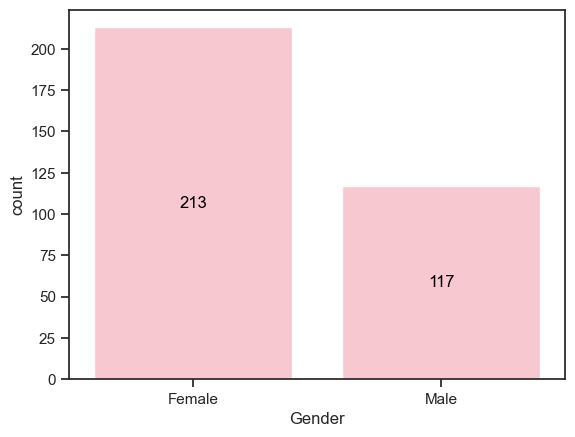

In [257]:
gndr = sns.countplot(data = survey_df, x=survey_df.Gender, color='pink')
gndr.bar_label(container = gndr.containers[0], label_type='center', color='black')
plt.show()

In [254]:
pd.crosstab(index=survey_df.Movie, columns=survey_df.Marital_Status, values=survey_df.Gender, aggfunc='count')

Marital_Status,Married,Single
Movie,,
Ferris Buellers Day Off,41,96
Old School,11,21
Willy Wonka,48,113


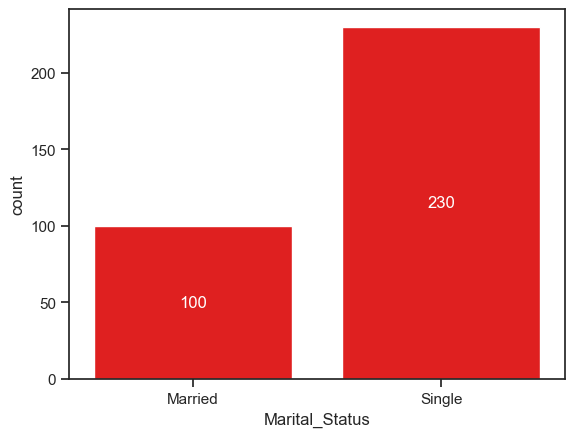

In [259]:
ms = sns.countplot(data = survey_df, x=survey_df.Marital_Status, color='red')
ms.bar_label(container = ms.containers[0], label_type='center', color='white')
plt.show()

In [269]:
## The patron’s annual household income: 1 = Less than $50,000; 2 = $50-$100,000; 3 = $100,000+

In [251]:
pd.crosstab(index=survey_df.Movie, columns=survey_df.Income, values=survey_df.Gender, aggfunc='count').T

Movie,Ferris Buellers Day Off,Old School,Willy Wonka
Income,,,
1.0,61,14,83
2.0,39,7,36
3.0,37,11,42


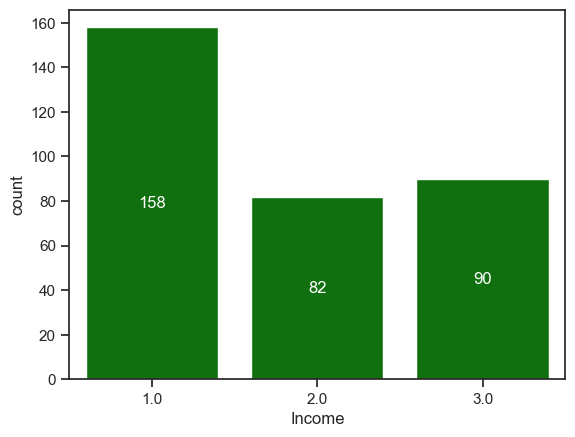

In [260]:
incm = sns.countplot(data = survey_df, x=survey_df.Income, color='green')
incm.bar_label(container = incm.containers[0], label_type='center', color='white')
plt.show()

In [270]:
## The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+

In [253]:
pd.crosstab(index=survey_df.Movie, columns=survey_df.Age, values=survey_df.Gender, aggfunc='count').T

Movie,Ferris Buellers Day Off,Old School,Willy Wonka
Age,,,
1.0,12.0,2.0,12.0
2.0,70.0,20.0,87.0
3.0,48.0,10.0,59.0
4.0,7.0,NaN,3.0


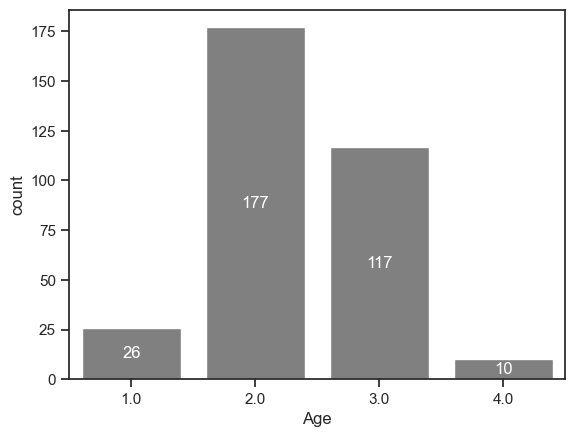

In [261]:
ag = sns.countplot(data = survey_df, x=survey_df.Age, color='grey')
ag.bar_label(container = ag.containers[0], label_type='center', color='white')
plt.show()

#### Demographic profile of patrons:
### Most of the patrons are Female
### Among these patrons, there are more SINGLES than MARRIED
### Most of them belongs to income group : Less than $50,000
### Most of them are in the age Category : 13-30 years

In [ ]:
4. In what media outlet(s) should the film series be advertised?

In [271]:
## Hear via: 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth

In [262]:
survey_df.Hear_About.unique()

array(['5', '1', '4', '2', '3', '4,5', '2,5', '1,5', '3,4', '5,4', '3,5'],
      dtype=object)

In [263]:
survey_df.Hear_About.dtype

dtype('O')

In [265]:
##cleaning the Hear_About column
survey_df.Hear_About = survey_df.Hear_About.str.replace('4,5','4').str.replace('2,5','2').str.replace('1,5','1').str.replace('3,4','3')
survey_df.Hear_About = survey_df.Hear_About.str.replace('5,4','5').str.replace('3,5','3')

In [266]:
survey_df.Hear_About.unique()

array(['5', '1', '4', '2', '3'], dtype=object)

In [268]:
pd.crosstab(survey_df.Movie,survey_df.Hear_About).T

Movie,Ferris Buellers Day Off,Old School,Willy Wonka
Hear_About,,,
1,14,1,8
2,5,4,5
3,4,2,11
4,18,1,23
5,96,24,114


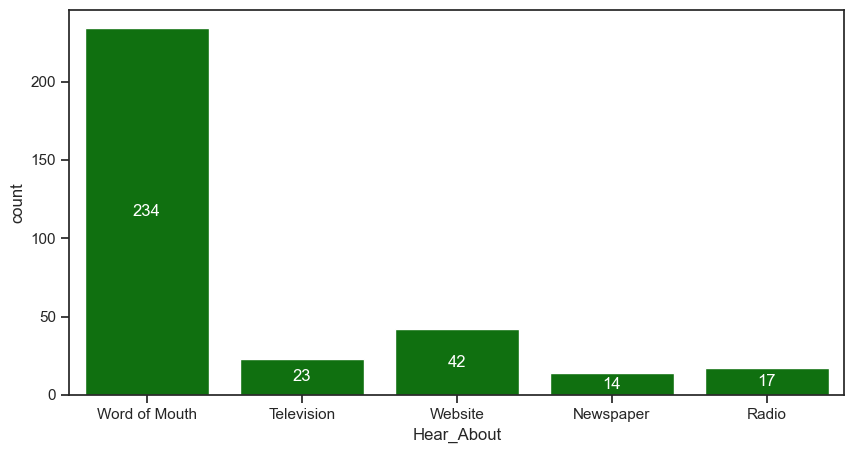

In [283]:
plt.figure(figsize=(10,5))
mda = sns.countplot(data = survey_df, x=survey_df.Hear_About.str.replace('1','Television').str.replace('2','Newspaper').str.replace('3','Radio')\
                    .str.replace('4','Website').str.replace('5','Word of Mouth'), color='green')
mda.bar_label(container = mda.containers[0], label_type='center', color='white')
plt.show()

## The PROMOTERS should focus on advertising in these outlets - Television, Newspaper, Radio, Website